In [2056]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as linreg
import numpy as np


In [2057]:
# Read the restaurant data and the study results
Kyoto_res = pd.read_csv("Rest_Ky.csv")
Kyoto_plc= pd.read_csv("attract_kyoto.csv", encoding="ISO-8859-1")

Kyoto_res.head(10)

,Unnamed: 0.1,Unnamed: 0,Name,Station,FirstCategory,SecondCategory,TotalRating,ReviewNum,Lat,Long,Category,DinnerPriceLow,DinnerPriceHigh,LunchPriceLow,LunchPriceHigh
0,0,1,Orudeidainingurajou,Kyoto,Buffet style,Cafe,3.39,56,34.986175,135.761314,Buffet style Cafe,￥4000,￥4999,￥2000,￥2999
1,1,2,Steak Frites Gaspard zinzin,Karasuma,Bistro,Steak,3.18,70,35.005826,135.759857,Bistro Steak,￥3000,￥3999,￥1000,￥1999
2,2,3,KAZUMA,Sanjo,Izakaya (Tavern),Japanese food (other),3.28,7,35.006583,135.770247,Izakaya (Tavern) Japanese food (other),￥3000,￥3999,NaN,NaN
3,3,4,okonomiyakiteppanyakimiki,Tambaguchi,Okonomiyaki,Izakaya (Tavern),3.14,16,34.995924,135.748267,Okonomiyaki Izakaya (Tavern),￥3000,￥3999,NaN,NaN
4,4,5,Shaofeiyan,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,3.16,23,35.007901,135.768202,Chinese hot pot / fire pot Chinese,￥4000,￥4999,￥1000,￥1999
5,5,6,okuta-va,Kyoto,Bar,Italian,3.08,24,34.983497,135.760559,Bar Italian,￥4000,￥4999,￥1000,￥1999
6,6,7,Resort dining&bar HaLe,Sanjo,Italian,Bar,3.04,22,35.007195,135.769468,Italian Bar,￥3000,￥3999,￥1000,￥1999
7,7,8,Sumika,Kawaramachi,Izakaya (Tavern),Creative cuisine,3.34,23,35.004704,135.770182,Izakaya (Tavern) Creative cuisine,￥3000,￥3999,NaN,NaN
8,8,9,Gayagaya,Sanjo,Izakaya (Tavern),Bar,3.03,3,35.007174,135.769968,Izakaya (Tavern) Bar,￥3000,￥3999,NaN,NaN
9,9,10,Ishibekoujimamecha,Gion Shijo,Izakaya (Tavern),Kyoto Cuisine,3.56,92,35.000813,135.779155,Izakaya (Tavern) Kyoto Cuisine,￥4000,￥4999,NaN,NaN


In [2058]:

Kyoto_res=Kyoto_res.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'FirstCategory', 'SecondCategory', 'LunchPriceLow', 'LunchPriceHigh'])

#Kyoto_res.head()

In [2059]:
#Kyoto_res=Kyoto_res.dropna()
Kyoto_res = Kyoto_res.dropna(subset=['DinnerPriceLow', 'DinnerPriceHigh'])
Kyoto_res = Kyoto_res.reset_index(drop = True)

#price=[]
Kyoto_res['Price']=''
df = Kyoto_res.infer_objects()
Kyoto_res['DinnerPriceLow'] = Kyoto_res['DinnerPriceLow'].apply(lambda x: x.replace('￥', ''))
Kyoto_res['DinnerPriceLow'] = pd.to_numeric(Kyoto_res['DinnerPriceLow'], errors='coerce')

#for k in range(0, len(Kyoto_res['Price'])):
#try:
Kyoto_res['DinnerPriceHigh'] = Kyoto_res['DinnerPriceHigh'].apply(lambda x: x.replace('￥', ''))
#except: 
#    pass

Kyoto_res['DinnerPriceHigh'] = pd.to_numeric(Kyoto_res['DinnerPriceHigh'], errors='coerce')
for k in range(0, len(Kyoto_res['DinnerPriceLow'])):
    Kyoto_res['Price'][k]=(Kyoto_res['DinnerPriceLow'][k]+Kyoto_res['DinnerPriceHigh'][k])/2

#Kyoto_res.head()
#Kyoto_res['Price']

In [2060]:
Kyoto_rest=Kyoto_res.dropna()
Kyoto_rest=Kyoto_rest.drop(columns=['DinnerPriceLow', 'DinnerPriceHigh'])
Kyoto_rest.head()

,Name,Station,TotalRating,ReviewNum,Lat,Long,Category,Price
0,Orudeidainingurajou,Kyoto,3.39,56,34.986175,135.761314,Buffet style Cafe,4499.5
1,Steak Frites Gaspard zinzin,Karasuma,3.18,70,35.005826,135.759857,Bistro Steak,3499.5
2,KAZUMA,Sanjo,3.28,7,35.006583,135.770247,Izakaya (Tavern) Japanese food (other),3499.5
3,okonomiyakiteppanyakimiki,Tambaguchi,3.14,16,34.995924,135.748267,Okonomiyaki Izakaya (Tavern),3499.5
4,Shaofeiyan,Kyoto Shiyakusho Mae,3.16,23,35.007901,135.768202,Chinese hot pot / fire pot Chinese,4499.5


In [2061]:
Kyoto_rest['Price'] = pd.to_numeric(Kyoto_rest['Price'], errors='coerce')

#for k in range(0, len(Kyoto_rest['Price'])):
Kyoto_rest['Price US'] = Kyoto_rest[('Price')]*0.0076
Kyoto_rest

,Name,Station,TotalRating,ReviewNum,Lat,Long,Category,Price,Price US
0,Orudeidainingurajou,Kyoto,3.39,56,34.986175,135.761314,Buffet style Cafe,4499.5,34.1962
1,Steak Frites Gaspard zinzin,Karasuma,3.18,70,35.005826,135.759857,Bistro Steak,3499.5,26.5962
2,KAZUMA,Sanjo,3.28,7,35.006583,135.770247,Izakaya (Tavern) Japanese food (other),3499.5,26.5962
3,okonomiyakiteppanyakimiki,Tambaguchi,3.14,16,34.995924,135.748267,Okonomiyaki Izakaya (Tavern),3499.5,26.5962
4,Shaofeiyan,Kyoto Shiyakusho Mae,3.16,23,35.007901,135.768202,Chinese hot pot / fire pot Chinese,4499.5,34.1962
...,...,...,...,...,...,...,...,...,...
889,Waraku,Fukuchiyama,3.00,12,35.298917,135.118341,Izakaya (Tavern) Kaiseki (Traditional Japanese),2499.5,18.9962
890,YEBISU BAR,Kyoto,3.08,70,34.988132,135.759215,Beer bar Bar,3499.5,26.5962
891,Ibushiginkazuya,Kawaramachi,3.36,11,35.006449,135.769653,Bar Nihonshu (Japanese sake),3499.5,26.5962
892,Tenichi,Kyoto,3.51,52,34.985887,135.757672,Tempura Ten-don (Tempura Bowl),6999.5,53.1962


In [2062]:
#Kyoto_rest_high=Kyoto_rest.loc[((Kyoto_rest['TotalRating']>=3.09)&(Kyoto_rest['ReviewNum']>7)),:]
#Kyoto_rest_high.describe()


In [2063]:
#Finding the distance between the Kyoto center and over objects
# latitude 1 deg = 111,300 meters, longitude 1 deg =91,300 meters (for Latitude = 35), 
# Kyoto center = (35.022655, 135.75726)
# latitude 1 deg = 55800 meters, longitude 1 deg =111300 meters, 
# Kyoto center = (35.022655, 135.75726)
def dist(x,y):
    return (((111300*(x-35.022655))**2+(91300*(y-135.75726))**2)**0.5).round(decimals = 0)

In [2064]:
Kyoto_rest['Distance (m)']=dist(Kyoto_rest['Lat'], Kyoto_rest['Long'])
#Kyoto_rest['Distance (m)']=(((111300*(Kyoto_rest['Lat']-35.022655))**2+(91300*(Kyoto_rest['Long']-135.75726))**2)**0.5).round(decimals = 0)
Kyoto_rest.describe()

,TotalRating,ReviewNum,Lat,Long,Price,Price US,Distance (m)
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,3.209724,23.552874,35.004590,135.756382,4711.568966,35.807924,4131.128736
std,0.215062,27.407740,0.057998,0.052676,3237.994250,24.608756,7194.953175
min,3.000000,1.000000,34.715818,135.118341,1499.500000,11.396200,337.000000
25%,3.050000,7.000000,34.996044,135.757591,3499.500000,26.596200,2019.000000
50%,3.090000,15.000000,35.004454,135.762688,3499.500000,26.596200,2372.000000
75%,3.410000,29.000000,35.008436,135.770657,5249.500000,39.896200,3744.000000
max,4.190000,272.000000,35.475659,135.831994,24999.500000,189.996200,65941.000000


In [2065]:

#Kyoto_plc['Distance (m)']=(((111300*(Kyoto_plc['Lat']-35.022655))**2+(91300*(Kyoto_plc['Long']-135.75726))**2)**0.5).round(decimals = 0)
Kyoto_plc['Distance (m)']=dist(Kyoto_plc['Lat'], Kyoto_plc['Long'])
Kyoto_plc.head(10)

,Name,Description,Link,Lat,Long,Distance (m)
0,Nijo Castle,Historic wood castle with gargens,https://nijo-jocastle.city.kyoto.lg.jp/?lang=en,35.014230,135.744098,1524.0
1,Fushimi-Inari Taisha Shrine,Mountainside Shinto shrine dating from 711 A.D...,http://inari.jp/en/,34.967140,135.770483,6296.0
2,Kinkaku-ji (The Golden Pavilion),Historic tranquil temple with a gold-leaf faca...,https://www.shokoku-ji.jp/en/kinkakuji/,35.039370,135.727054,3327.0
3,Kiyomizu-dera Temple,Iconic Buddhist temple on Mount Otowa known fo...,www.kiyomizudera.or.jp/en/,34.994856,135.782858,3877.0
4,Gion's Geishas and Temples,Traditional shrines and temples are located th...,https://journeycompass.com/gion-kyoto-guide/,35.001850,135.776770,2921.0
5,Arashiyama Monkey Park,Popular area atop Mt Arashiyama for viewing wi...,http://www.monkeypark.jp/eng-index.html,35.008910,135.674770,7685.0
6,The Kyoto National Museum and Municipal Museum...,The Kyoto National Museum was established to c...,www.kyohaku.go.jp/eng/index.html,34.989989,135.756637,3636.0
7,Kyoto Samurai and Ninja Museum,Small museum with Edo-period armor (sword disp...,https://mai-ko.com/samurai/,35.004856,135.764579,2091.0
8,Toji,Historic Buddhist temple with a 5-story wooden...,https://toji.or.jp/,34.980598,135.745597,4801.0
9,Maruyama Park,Popular green space with an outdoor music hall...,https://kyoto-maruyama-park.jp/,35.003880,135.780910,3005.0


In [2066]:
#for i in range(0, len(Kyoto_rest['TotalRating'])):
# Creating a new fair rating: column Rating 
Kyoto_rest['Rating']=np.where(Kyoto_rest['ReviewNum'] <=7 , Kyoto_rest['TotalRating']*0.75, 0) 
Kyoto_rest.loc[(df['ReviewNum'] <=15)&(df['ReviewNum'] >7), 'Rating'] = Kyoto_rest['TotalRating']*0.8
Kyoto_rest.loc[(df['ReviewNum'] <=29)&(df['ReviewNum'] >15), 'Rating'] = Kyoto_rest['TotalRating']*0.85
Kyoto_rest.loc[(df['ReviewNum'] >29), 'Rating'] = Kyoto_rest['TotalRating']
Kyoto_rest.describe()

,TotalRating,ReviewNum,Lat,Long,Price,Price US,Distance (m),Rating
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,3.209724,23.552874,35.004590,135.756382,4711.568966,35.807924,4131.128736,2.731202
std,0.215062,27.407740,0.057998,0.052676,3237.994250,24.608756,7194.953175,0.436755
min,3.000000,1.000000,34.715818,135.118341,1499.500000,11.396200,337.000000,2.250000
25%,3.050000,7.000000,34.996044,135.757591,3499.500000,26.596200,2019.000000,2.400000
50%,3.090000,15.000000,35.004454,135.762688,3499.500000,26.596200,2372.000000,2.601000
75%,3.410000,29.000000,35.008436,135.770657,5249.500000,39.896200,3744.000000,3.015375
max,4.190000,272.000000,35.475659,135.831994,24999.500000,189.996200,65941.000000,4.190000


In [2067]:
from scipy. stats import ttest_rel
ttest_rel(Kyoto_rest['TotalRating'], Kyoto_rest['Rating'])

Ttest_relResult(statistic=48.540792428362586, pvalue=1.0864818360020917e-249)

In [2068]:
Kyoto_plc.to_csv("Attractions.csv")

In [2069]:

# Define a function to create Linear Regression plots
def slope(x,y):
    return linreg.linregress(x, y)[0]

def intpt(x,y):
    return linreg.linregress(x, y)[1]

def corr(x,y):
    return linreg.linregress(x, y)[2]
#y_reg=Kyoto_rest['Rating']
#x_reg=Kyoto_rest['ReviewNum']
#print(linreg.linregress(x_reg, y_reg))

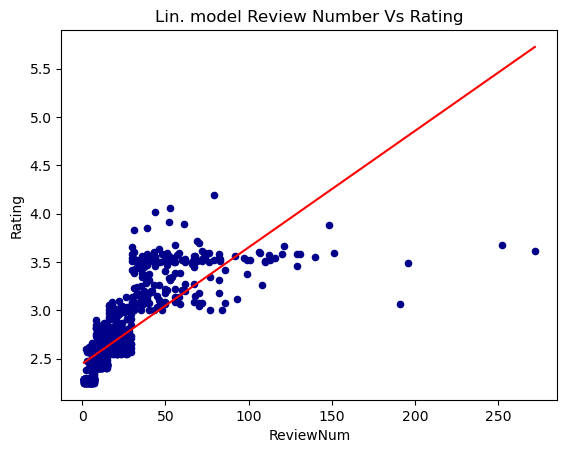

y = 0.01x + 2.45, r = 0.76


In [2070]:
Kyoto_rest.plot.scatter('ReviewNum','Rating', c='DarkBlue')

plt.xlabel("ReviewNum")
plt.ylabel("Rating")
y_reg=Kyoto_rest['Rating']
x_reg=Kyoto_rest['ReviewNum']
x_min=Kyoto_rest['ReviewNum'].min()
x_max=Kyoto_rest['ReviewNum'].max()
y1 = x_min * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
y2 = x_max * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
plt.plot([x_min, x_max], [y1, y2], color ='r')
line_eq = 'y = ' + str(round(slope(x_reg, y_reg),2)) + 'x + ' + str(round(intpt(x_reg, y_reg),2))
plt.annotate(line_eq, (8, 6), xytext=(1,1),  fontsize=12, color="red")
plt.annotate(f'r = {str(round(corr(x_reg, y_reg),2))}', (4,2), fontsize=12, color="red")
plt.title(f"Lin. model Review Number Vs Rating")
plt.show()
print(f'{line_eq}, r = {str(round(corr(x_reg, y_reg),2))}')


In [2071]:
#Find the best restaurant 
Kyoto_rest.describe()


,TotalRating,ReviewNum,Lat,Long,Price,Price US,Distance (m),Rating
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,3.209724,23.552874,35.004590,135.756382,4711.568966,35.807924,4131.128736,2.731202
std,0.215062,27.407740,0.057998,0.052676,3237.994250,24.608756,7194.953175,0.436755
min,3.000000,1.000000,34.715818,135.118341,1499.500000,11.396200,337.000000,2.250000
25%,3.050000,7.000000,34.996044,135.757591,3499.500000,26.596200,2019.000000,2.400000
50%,3.090000,15.000000,35.004454,135.762688,3499.500000,26.596200,2372.000000,2.601000
75%,3.410000,29.000000,35.008436,135.770657,5249.500000,39.896200,3744.000000,3.015375
max,4.190000,272.000000,35.475659,135.831994,24999.500000,189.996200,65941.000000,4.190000


In [2072]:
Kyoto_rest_high=Kyoto_rest.loc[((Kyoto_rest['Rating']>=3)&(Kyoto_rest['ReviewNum']>7)&
(Kyoto_rest['ReviewNum']< 150)&(Kyoto_rest['Distance (m)']<=2280)),:]
Kyoto_rest_high.describe()


,TotalRating,ReviewNum,Lat,Long,Price,Price US,Distance (m),Rating
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,3.424595,52.828829,35.008563,135.763172,5089.590090,38.680885,1819.666667,3.381216
std,0.214395,25.358475,0.005942,0.005703,4309.713236,32.753821,378.808283,0.234510
min,3.000000,18.000000,35.002423,135.747842,1499.500000,11.396200,617.000000,3.000000
25%,3.245000,35.000000,35.004750,135.758596,3499.500000,26.596200,1628.500000,3.170000
50%,3.500000,45.000000,35.007212,135.762823,3499.500000,26.596200,1948.000000,3.460000
75%,3.545000,66.000000,35.010354,135.769020,5499.500000,41.796200,2101.000000,3.530000
max,4.190000,148.000000,35.035797,135.773972,24999.500000,189.996200,2279.000000,4.190000


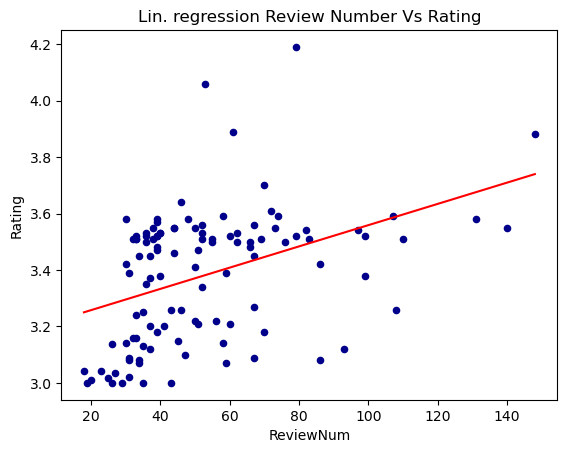

y = 0.0038x + 3.18, r = 0.41


In [2073]:
Kyoto_rest_high.plot.scatter('ReviewNum','Rating', c='DarkBlue')

plt.xlabel("ReviewNum")
plt.ylabel("Rating")
y_reg=Kyoto_rest_high['Rating']
x_reg=Kyoto_rest_high['ReviewNum']
x_min=Kyoto_rest_high['ReviewNum'].min()
x_max=Kyoto_rest_high['ReviewNum'].max()
y1 = x_min * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
y2 = x_max * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
plt.plot([x_min, x_max], [y1, y2], color ='r')
line_eq = 'y = ' + str(round(slope(x_reg, y_reg),4)) + 'x + ' + str(round(intpt(x_reg, y_reg),2))
plt.annotate(line_eq, (8, 6), xytext=(1,1),  fontsize=12, color="red")
plt.annotate(f'r = {str(round(corr(x_reg, y_reg),2))}', (4,2), fontsize=12, color="red")
plt.title(f"Lin. regression Review Number Vs Rating")
plt.show()
print(f'{line_eq}, r = {str(round(corr(x_reg, y_reg),2))}')

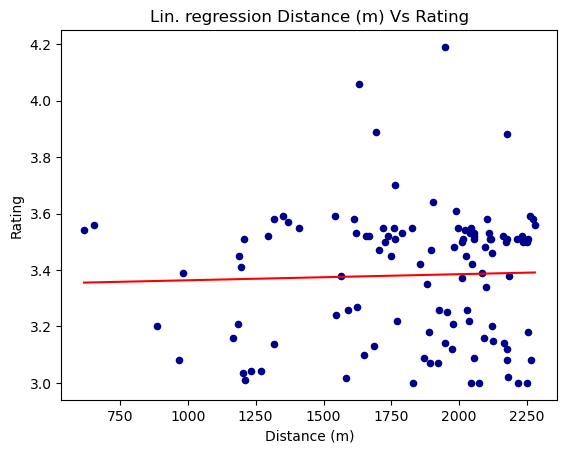

y = 0.0x + 3.34, r = 0.03


In [2074]:
Kyoto_rest_high.plot.scatter('Distance (m)','Rating', c='DarkBlue')

plt.xlabel("Distance (m)")
plt.ylabel("Rating")
y_reg=Kyoto_rest_high['Rating']
x_reg=Kyoto_rest_high['Distance (m)']
x_min=Kyoto_rest_high['Distance (m)'].min()
x_max=Kyoto_rest_high['Distance (m)'].max()
y1 = x_min * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
y2 = x_max * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
plt.plot([x_min, x_max], [y1, y2], color ='r')
line_eq = 'y = ' + str(round(slope(x_reg, y_reg), 4)) + 'x + ' + str(round(intpt(x_reg, y_reg),2))
plt.annotate(line_eq, (10,8),  xytext=(10,2), fontsize=12, color="red")
#plt.annotate(f'r = {str(round(corr(x_reg, y_reg),2))}',(5,4), xytext=(15,4),  fontsize=12, color="red")
plt.title(f"Lin. regression Distance (m) Vs Rating")
plt.show()
print(f'{line_eq}, r = {str(round(corr(x_reg, y_reg),2))}')

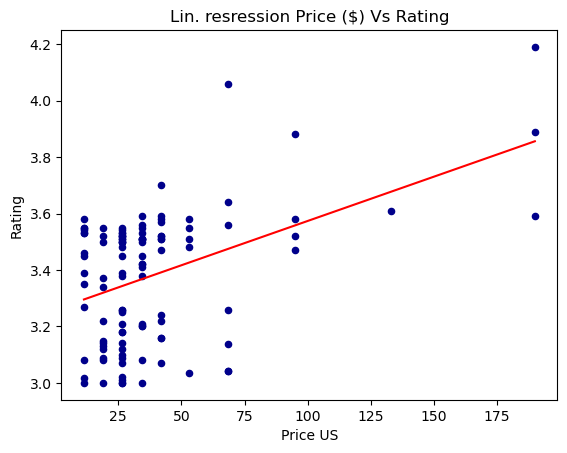

y = 0.0031x + 3.26, r = 0.44


In [2075]:
Kyoto_rest_high.plot.scatter('Price US','Rating', c='DarkBlue')

plt.xlabel("Price US")
plt.ylabel("Rating")
y_reg=Kyoto_rest_high['Rating']
x_reg=Kyoto_rest_high['Price US']
x_min=Kyoto_rest_high['Price US'].min()
x_max=Kyoto_rest_high['Price US'].max()
y1 = x_min * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
y2 = x_max * slope(x_reg, y_reg)+intpt(x_reg, y_reg)
plt.plot([x_min, x_max], [y1, y2], color ='r')
line_eq = 'y = ' + str(round(slope(x_reg, y_reg), 4)) + 'x + ' + str(round(intpt(x_reg, y_reg),2))
plt.annotate(line_eq, (10,8),  xytext=(10,2), fontsize=12, color="red")
#plt.annotate(f'r = {str(round(corr(x_reg, y_reg),2))}',(5,4), xytext=(15,4),  fontsize=12, color="red")
plt.title(f"Lin. resression Price ($) Vs Rating")
plt.show()
print(f'{line_eq}, r = {str(round(corr(x_reg, y_reg),2))}')

In [2076]:
#Kyoto_r = Kyoto_rest_high.groupby(['FirstCategory','SecondCategory']).mean()['Price US']
#Kyoto_dic=Kyoto_r.to_dict()
#Kyoto_r

In [2077]:
# Use DataFrame.plot() in order to create a bar chart of the data
#Kyoto_r.plot(kind="bar", figsize=(100,5), width=0.4)

In [2078]:
Kyoto_plc.head()

,Name,Description,Link,Lat,Long,Distance (m)
0,Nijo Castle,Historic wood castle with gargens,https://nijo-jocastle.city.kyoto.lg.jp/?lang=en,35.014230,135.744098,1524.0
1,Fushimi-Inari Taisha Shrine,Mountainside Shinto shrine dating from 711 A.D...,http://inari.jp/en/,34.967140,135.770483,6296.0
2,Kinkaku-ji (The Golden Pavilion),Historic tranquil temple with a gold-leaf faca...,https://www.shokoku-ji.jp/en/kinkakuji/,35.039370,135.727054,3327.0
3,Kiyomizu-dera Temple,Iconic Buddhist temple on Mount Otowa known fo...,www.kiyomizudera.or.jp/en/,34.994856,135.782858,3877.0
4,Gion's Geishas and Temples,Traditional shrines and temples are located th...,https://journeycompass.com/gion-kyoto-guide/,35.001850,135.776770,2921.0


In [2079]:
import hvplot.pandas

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

map_plot = Kyoto_plc.hvplot.points(
    "Long",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 500,
    scale = 0.4,
    size = "Distance (m)",
    color = "Name"
)

# Display the map plot
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Long,Lat]   (Name,Distance (m))

In [2080]:
map_plot = Kyoto_rest_high.hvplot.points(
    "Long",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 500,
    scale = 0.2,
    size = "Distance (m)",
    color = "Name"
)

# Display the map plot
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Long,Lat]   (Name,Distance (m))

In [2081]:
Kyoto_rest_high= Kyoto_rest_high.reset_index(drop=True, inplace=False)
Kyoto_plc= Kyoto_plc.reset_index(drop=True, inplace=False)

Kyoto_rest_high.head()

,Name,Station,TotalRating,ReviewNum,Lat,Long,Category,Price,Price US,Distance (m),Rating
0,Steak Frites Gaspard zinzin,Karasuma,3.18,70,35.005826,135.759857,Bistro Steak,3499.5,26.5962,1888.0,3.18
1,Sakaean,Karasuma,3.09,31,35.004684,135.762414,Izakaya (Tavern) Nihonshu (Japanese sake),2499.5,18.9962,2055.0,3.09
2,kyoutohyouto,Karasuma,3.64,46,35.005591,135.758329,Pork Shabu Shabu Shabu Shabu (Japanese Steamboat),8999.5,68.3962,1902.0,3.64
3,Kyoutodaina,Karasuma,3.54,82,35.005307,135.763881,Bistro Bar,3499.5,26.5962,2023.0,3.54
4,Resutoraniro,Karasuma,3.08,31,35.002915,135.763259,Izakaya (Tavern) Creative cuisine,4499.5,34.1962,2264.0,3.08


In [2082]:
#Cleaning the dataframe, changing the positions of columns, removing restaurants with low raiting

Kyoto_final=Kyoto_rest_high.drop(columns=['TotalRating', 'Price'])
Kyoto_final=Kyoto_final[['Name', 'Category', 'Rating', 'ReviewNum', 'Price US', 'Station', 'Distance (m)', 'Lat', 'Long']]
Kyoto_final = Kyoto_final.sort_values("Rating", ascending=False)
Kyoto_final= Kyoto_final.reset_index(drop=True, inplace=False)
Kyoto_final.head(10)

,Name,Category,Rating,ReviewNum,Price US,Station,Distance (m),Lat,Long
0,Kichisen,Kaiseki (Traditional Japanese) nan,4.19,79,189.9962,Demachiyanagi,1948.0,35.035797,135.771352
1,ORTO,Innovative cuisine Fusion cuisine,4.06,53,68.3962,Karasuma Oike,1632.0,35.007991,135.757053
2,nihonryourisakuragawa,Kaiseki (Traditional Japanese) Kappo (Traditio...,3.89,61,189.9962,Kyoto Shiyakusho Mae,1692.0,35.012176,135.770684
3,Orudohonkonresutorankyouto,Chinese Cantonese Cuisine,3.88,148,94.9962,Shijo,2178.0,35.003150,135.759123
4,Ryuunohige,Kyoto Cuisine French,3.70,70,41.7962,Kyoto Shiyakusho Mae,1765.0,35.010281,135.769350
5,kyoutohyouto,Pork Shabu Shabu Shabu Shabu (Japanese Steamboat),3.64,46,68.3962,Karasuma,1902.0,35.005591,135.758329
6,Shimogamosaryou,Kaiseki (Traditional Japanese) Kyoto Cuisine,3.61,72,132.9962,Demachiyanagi,1989.0,35.034119,135.773972
7,Kamogawatakashi,Yakiniku (BBQ Beef) Kaiseki (Traditional Japan...,3.59,58,41.7962,Jingu Marutamachi,1350.0,35.015878,135.769526
8,Tankumakitamise,Kyoto Cuisine Kaiseki (Traditional Japanese),3.59,74,189.9962,Kawaramachi,2262.0,35.005236,135.770031
9,FORTUNE GARDEN KYOTO,Bistro Western Cuisine,3.59,107,34.1962,Kyoto Shiyakusho Mae,1541.0,35.012517,135.768752


In [2083]:
Kyoto_final.describe()

,Rating,ReviewNum,Price US,Distance (m),Lat,Long
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,3.381216,52.828829,38.680885,1819.666667,35.008563,135.763172
std,0.234510,25.358475,32.753821,378.808283,0.005942,0.005703
min,3.000000,18.000000,11.396200,617.000000,35.002423,135.747842
25%,3.170000,35.000000,26.596200,1628.500000,35.004750,135.758596
50%,3.460000,45.000000,26.596200,1948.000000,35.007212,135.762823
75%,3.530000,66.000000,41.796200,2101.000000,35.010354,135.769020
max,4.190000,148.000000,189.996200,2279.000000,35.035797,135.773972


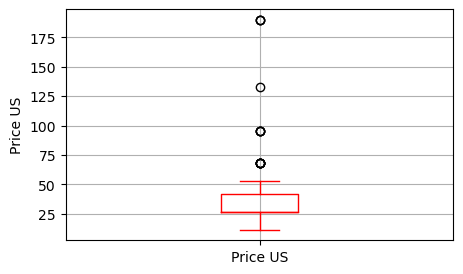

In [2084]:
Kyoto_final.boxplot(column=['Price US'],fontsize=10,
grid=True, figsize=(5,3), widths=0.2, showfliers=None, color='r', rot=0) 
plt.ylabel("Price US")
plt.show()

You shouldn't pay more than $42 (Q3) for lunch. Also four outliers shouldn't be recommended for tourists since they are overpriced. Ideal amount for lunch is around $27 (Median); not mean since the distribution is skewed. 

In [2085]:
Kyoto_final=Kyoto_final.loc[Kyoto_final['Rating']>3.53,:]
Kyoto_final


,Name,Category,Rating,ReviewNum,Price US,Station,Distance (m),Lat,Long
0,Kichisen,Kaiseki (Traditional Japanese) nan,4.19,79,189.9962,Demachiyanagi,1948.0,35.035797,135.771352
1,ORTO,Innovative cuisine Fusion cuisine,4.06,53,68.3962,Karasuma Oike,1632.0,35.007991,135.757053
2,nihonryourisakuragawa,Kaiseki (Traditional Japanese) Kappo (Traditio...,3.89,61,189.9962,Kyoto Shiyakusho Mae,1692.0,35.012176,135.770684
3,Orudohonkonresutorankyouto,Chinese Cantonese Cuisine,3.88,148,94.9962,Shijo,2178.0,35.003150,135.759123
4,Ryuunohige,Kyoto Cuisine French,3.70,70,41.7962,Kyoto Shiyakusho Mae,1765.0,35.010281,135.769350
5,kyoutohyouto,Pork Shabu Shabu Shabu Shabu (Japanese Steamboat),3.64,46,68.3962,Karasuma,1902.0,35.005591,135.758329
6,Shimogamosaryou,Kaiseki (Traditional Japanese) Kyoto Cuisine,3.61,72,132.9962,Demachiyanagi,1989.0,35.034119,135.773972
7,Kamogawatakashi,Yakiniku (BBQ Beef) Kaiseki (Traditional Japan...,3.59,58,41.7962,Jingu Marutamachi,1350.0,35.015878,135.769526
8,Tankumakitamise,Kyoto Cuisine Kaiseki (Traditional Japanese),3.59,74,189.9962,Kawaramachi,2262.0,35.005236,135.770031
9,FORTUNE GARDEN KYOTO,Bistro Western Cuisine,3.59,107,34.1962,Kyoto Shiyakusho Mae,1541.0,35.012517,135.768752


In [2086]:
#Finding restaurants from the list located within radius of 1000 meters from the historical place
rest=[]
list=[]
def distance(x1, y1, x2, y2):
    return ((111300*(x1-x2))**2+(91300*(y1-y2))**2)**0.5

for i in range(len(Kyoto_plc)):
    for n in range(len(Kyoto_final)):
        if distance(Kyoto_plc['Lat'][i], Kyoto_plc['Long'][i], Kyoto_final['Lat'][n], Kyoto_final['Long'][n])<1000:
            list.append(Kyoto_final['Name'][n])
    rest.append(list)
    list=[]
#rest

In [2087]:
Kyoto_dic=dict(zip(Kyoto_plc['Name'], rest))
Kyoto_dic

{'Nijo Castle': [],
 'Fushimi-Inari Taisha Shrine': [],
 'Kinkaku-ji (The Golden Pavilion)': [],
 'Kiyomizu-dera Temple': [],
 "Gion's Geishas and Temples": ['Tankumakitamise  ',
  'Ranka  ',
  'Kankokuanjupontochourinanha  '],
 'Arashiyama Monkey Park': [],
 'The Kyoto National Museum and Municipal Museum of Art': [],
 'Kyoto Samurai and Ninja Museum': ['ORTO  ',
  'nihonryourisakuragawa  ',
  'Orudohonkonresutorankyouto  ',
  'Ryuunohige  ',
  'kyoutohyouto  ',
  'Tankumakitamise  ',
  'FORTUNE GARDEN KYOTO  ',
  'Ranka  ',
  'Yakinikudainingukinoe  ',
  'Hanasaki  ',
  'Rojimon  ',
  'Kankokuanjupontochourinanha  ',
  'Suiba  ',
  'Brochette  ',
  'Norumandhi  ',
  'Komefuku  ',
  'Sou  ',
  'Kyoutodaina  '],
 'Toji': [],
 'Maruyama Park': ['Kankokuanjupontochourinanha  '],
 'Sannenzaka Ninenzaka district of Higashiyama': []}

In [2088]:
Kyoto_final

,Name,Category,Rating,ReviewNum,Price US,Station,Distance (m),Lat,Long
0,Kichisen,Kaiseki (Traditional Japanese) nan,4.19,79,189.9962,Demachiyanagi,1948.0,35.035797,135.771352
1,ORTO,Innovative cuisine Fusion cuisine,4.06,53,68.3962,Karasuma Oike,1632.0,35.007991,135.757053
2,nihonryourisakuragawa,Kaiseki (Traditional Japanese) Kappo (Traditio...,3.89,61,189.9962,Kyoto Shiyakusho Mae,1692.0,35.012176,135.770684
3,Orudohonkonresutorankyouto,Chinese Cantonese Cuisine,3.88,148,94.9962,Shijo,2178.0,35.003150,135.759123
4,Ryuunohige,Kyoto Cuisine French,3.70,70,41.7962,Kyoto Shiyakusho Mae,1765.0,35.010281,135.769350
5,kyoutohyouto,Pork Shabu Shabu Shabu Shabu (Japanese Steamboat),3.64,46,68.3962,Karasuma,1902.0,35.005591,135.758329
6,Shimogamosaryou,Kaiseki (Traditional Japanese) Kyoto Cuisine,3.61,72,132.9962,Demachiyanagi,1989.0,35.034119,135.773972
7,Kamogawatakashi,Yakiniku (BBQ Beef) Kaiseki (Traditional Japan...,3.59,58,41.7962,Jingu Marutamachi,1350.0,35.015878,135.769526
8,Tankumakitamise,Kyoto Cuisine Kaiseki (Traditional Japanese),3.59,74,189.9962,Kawaramachi,2262.0,35.005236,135.770031
9,FORTUNE GARDEN KYOTO,Bistro Western Cuisine,3.59,107,34.1962,Kyoto Shiyakusho Mae,1541.0,35.012517,135.768752


In [2089]:
for k in range(len(Kyoto_final)):
    if Kyoto_final['Category'][k].find('French') != -1:
        Kyoto_final['Category'][k]='French'
    else: pass
    if Kyoto_final['Category'][k].find('Korean') != -1:
        Kyoto_final['Category'][k]='Korean'
    else: pass                 
    if Kyoto_final['Category'][k].find('Japanese') != -1:
        Kyoto_final['Category'][k]='Japanese'
    else: pass
    if Kyoto_final['Category'][k].find('Bar') != -1:
        Kyoto_final['Category'][k]='Dining bar'
    else: pass
    if Kyoto_final['Category'][k].find('Pancake') != -1:
        Kyoto_final['Category'][k]='Dining bar'
    else: pass
    if Kyoto_final['Category'][k].find('Tavern') != -1:
        Kyoto_final['Category'][k]='Kyoto Tavern'
    else: pass
    #if Kyoto_final['Category'][k].find('Kyoto') != -1:
    #    Kyoto_final['Category'][k]='Japanese'
    #else: pass
    if Kyoto_final['Category'][k].find('Curry') != -1:
        Kyoto_final['Category'][k]='Japanese'
    else: pass
    if Kyoto_final['Category'][k].find('Noodle') != -1:
        Kyoto_final['Category'][k]='Japanese'
    else: pass
    if Kyoto_final['Category'][k].find('Innovative') != -1:
        Kyoto_final['Category'][k]='Chinese'
    else: pass
    if Kyoto_final['Category'][k].find('Bistro') != -1:
        Kyoto_final['Category'][k]='French'
    else: pass
    if Kyoto_final['Category'][k].find('Chinese') != -1:
        Kyoto_final['Category'][k]='Chinese'
    else: pass
    if Kyoto_final['Category'][k].find('Tempura') != -1:
        Kyoto_final['Category'][k]='Japanese'
    else: pass     
    
Kyoto_final

,Name,Category,Rating,ReviewNum,Price US,Station,Distance (m),Lat,Long
0,Kichisen,Japanese,4.19,79,189.9962,Demachiyanagi,1948.0,35.035797,135.771352
1,ORTO,Chinese,4.06,53,68.3962,Karasuma Oike,1632.0,35.007991,135.757053
2,nihonryourisakuragawa,Japanese,3.89,61,189.9962,Kyoto Shiyakusho Mae,1692.0,35.012176,135.770684
3,Orudohonkonresutorankyouto,Chinese,3.88,148,94.9962,Shijo,2178.0,35.003150,135.759123
4,Ryuunohige,French,3.70,70,41.7962,Kyoto Shiyakusho Mae,1765.0,35.010281,135.769350
5,kyoutohyouto,Japanese,3.64,46,68.3962,Karasuma,1902.0,35.005591,135.758329
6,Shimogamosaryou,Japanese,3.61,72,132.9962,Demachiyanagi,1989.0,35.034119,135.773972
7,Kamogawatakashi,Japanese,3.59,58,41.7962,Jingu Marutamachi,1350.0,35.015878,135.769526
8,Tankumakitamise,Japanese,3.59,74,189.9962,Kawaramachi,2262.0,35.005236,135.770031
9,FORTUNE GARDEN KYOTO,French,3.59,107,34.1962,Kyoto Shiyakusho Mae,1541.0,35.012517,135.768752


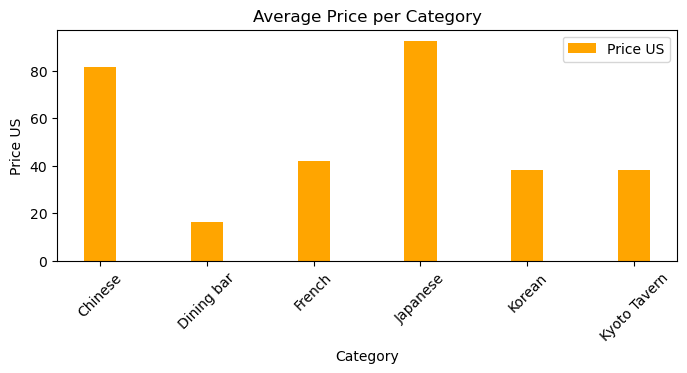

In [2090]:
Bar_price = Kyoto_final.groupby(Kyoto_final['Category'])['Price US'].mean()
Bar_price.plot(kind='bar',figsize=(8,3), width=0.3, color='Orange', legend='Price', rot=45)
plt.title("Average Price per Category")
#plt.xlabel("")
plt.ylabel("Price US")
plt.show()

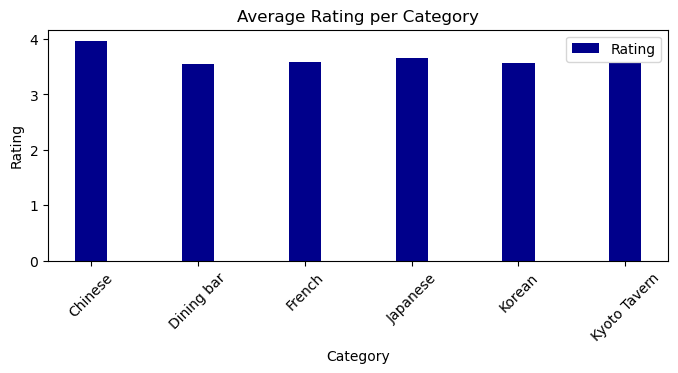

In [2091]:
Bar_rate = Kyoto_final.groupby(Kyoto_final['Category'])['Rating'].mean()
Bar_rate.plot(kind='bar',figsize=(8,3), width=0.3, color='DarkBlue', legend='None', rot=45)
plt.title("Average Rating per Category")
#plt.xlabel("")
plt.ylabel("Rating")
plt.show()

In [2092]:
Kyoto_final = Kyoto_final.sort_values("Price US", ascending=False)
Kyoto_final= Kyoto_final.reset_index(drop=True, inplace=False)
Kyoto_final.head(15)

,Name,Category,Rating,ReviewNum,Price US,Station,Distance (m),Lat,Long
0,Kichisen,Japanese,4.19,79,189.9962,Demachiyanagi,1948.0,35.035797,135.771352
1,nihonryourisakuragawa,Japanese,3.89,61,189.9962,Kyoto Shiyakusho Mae,1692.0,35.012176,135.770684
2,Tankumakitamise,Japanese,3.59,74,189.9962,Kawaramachi,2262.0,35.005236,135.770031
3,Shimogamosaryou,Japanese,3.61,72,132.9962,Demachiyanagi,1989.0,35.034119,135.773972
4,Orudohonkonresutorankyouto,Chinese,3.88,148,94.9962,Shijo,2178.0,35.003150,135.759123
5,Hanasaki,Japanese,3.58,30,94.9962,Karasuma,2103.0,35.004400,135.763206
6,ORTO,Chinese,4.06,53,68.3962,Karasuma Oike,1632.0,35.007991,135.757053
7,kyoutohyouto,Japanese,3.64,46,68.3962,Karasuma,1902.0,35.005591,135.758329
8,kyouryourikaji,Japanese,3.56,67,68.3962,Marutamachi,655.0,35.017234,135.754475
9,Norumandhi,French,3.55,38,53.1962,Kyoto Shiyakusho Mae,1760.0,35.010417,135.769477


In [2093]:
map_plot = Kyoto_final.hvplot.points(
    "Long",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 600,
    frame_height = 500,
    scale = 0.4,
    size = "Distance (m)",
    color = "Name"
)

# Display the map plot
map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Long,Lat]   (Name,Distance (m))

In [2096]:
Kyoto_final.to_csv('Best Kyoto Restaurants', index=True, header=True)

End of the story